In [2]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [151]:
img_gray=cv.imread('Downloads\Zoorich2.png',0)

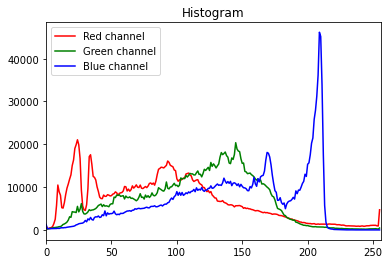

In [183]:
img_color=cv.imread('Downloads\Zoorich2.jpg')#hitogram computation
img_color=cv.cvtColor(img_color,cv.COLOR_BGR2RGB)
col=['r','g','b']
for i,c in enumerate(col):
    hist=cv.calcHist([img_color],[i],None,[256],[0,256])
    plt.plot(hist,color=c)
    plt.xlim([0,256])
    plt.title("Histogram")
plt.legend(('Red channel','Green channel','Blue channel'),loc='upper left')
plt.show()

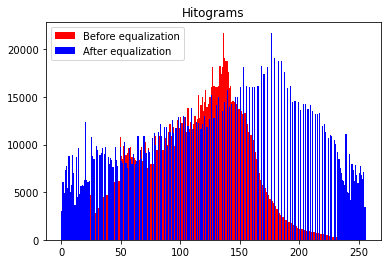

In [153]:
img_gray=cv.cvtColor(img_color,cv.COLOR_RGB2GRAY)#histogram equalization 
plt.hist(img_gray.ravel(),256,[0,256],color='r')
img_eq=cv.equalizeHist(img_gray)
plt.hist(img_eq.ravel(),256,[0,256],color='b')
plt.legend(('Before equalization','After equalization'),loc='upper left')
plt.title("Hitograms")
plt.show()

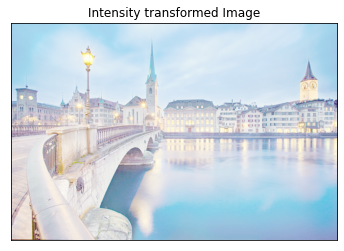

In [154]:
c=255/np.log(256)#intensity transformation 
table=np.array([c*np.log(1+i) for i in np.arange(0,256)]).astype('uint8')
intensity_t_image=cv.LUT(img_color,table)
plt.imshow(intensity_t_image)
plt.xticks([])
plt.yticks([])
plt.title("Intensity transformed Image")
plt.show()

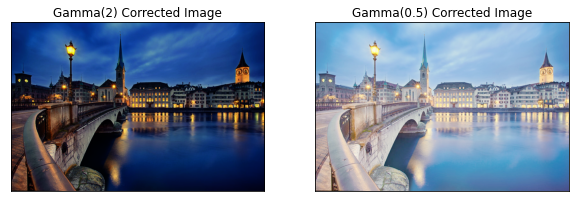

In [156]:
table_gamma_2=np.array([(i/255.0)**(2)*255.0 for i in np.arange(0,256)]).astype('uint8')#Gamma correction
table_gamma_0_5=np.array([(i/255.0)**(1/2)*255.0 for i in np.arange(0,256)]).astype('uint8')
gamma_img_0_5=cv.LUT(img_color,table_gamma_0_5)
gamma_img_2=cv.LUT(img_color,table_gamma_2)
fig,ax=plt.subplots(1,2,figsize=(10,10))
ax[0].imshow(gamma_img_2)
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[0].set_title("Gamma(2) Corrected Image")
ax[1].imshow(gamma_img_0_5)
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].set_title("Gamma(0.5) Corrected Image")
plt.show()

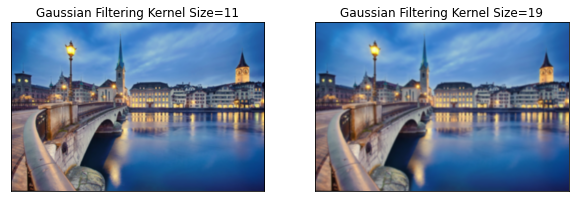

In [185]:
img_Gaussian=cv.GaussianBlur(img_color,(11,11),4)#Gaussian filtering 
img_Gaussian2=cv.GaussianBlur(img_color,(19,19),4)
fig,ax=plt.subplots(1,2,figsize=(10,10))
ax[0].imshow(img_Gaussian)
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[0].set_title("Gaussian Filtering Kernel Size=11")
ax[1].imshow(img_Gaussian2)
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].set_title("Gaussian Filtering Kernel Size=19")
plt.show()

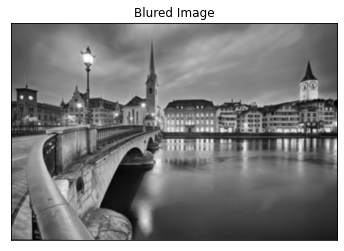

In [158]:
blured=cv.blur(img_gray,(7,7))#Bluring the image through averaging 
plt.imshow(blured,'gray')
plt.xticks([])
plt.yticks([])
plt.title("Blured Image")
plt.show()

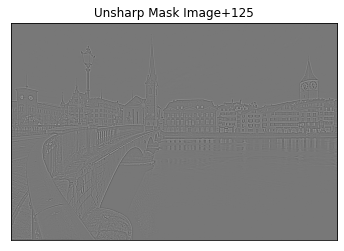

In [159]:
img_unsharp=img_gray-blured#unsharp masking 
plt.imshow(img_unsharp+125,'gray')
plt.xticks([])
plt.yticks([])
plt.title("Unsharp Mask Image+125")
plt.show()

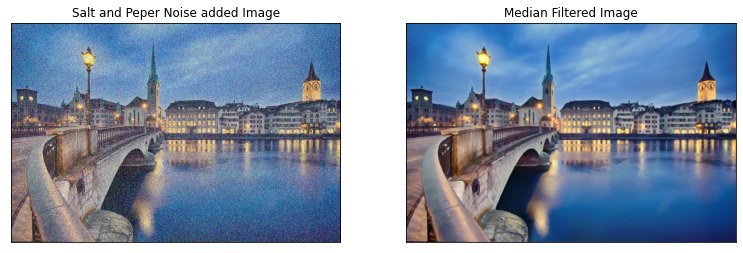

In [168]:
randt=np.random.rand(img_color.shape[0],img_color.shape[1],3)*255
randt.astype('uint8')
Noise_img=img_color
Noise_img[randt<=25]=0
Noise_img[randt>=220]=255#add salt and pepper noise to the img 
Median_img=cv.medianBlur(Noise_img,7)#Median blur on noise added image 
fig,ax=plt.subplots(1,2,figsize=(13,13))
ax[1].imshow(Median_img)
ax[0].imshow(Noise_img)
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].set_title("Median Filtered Image")
ax[0].set_title("Salt and Peper Noise added Image")
plt.show()

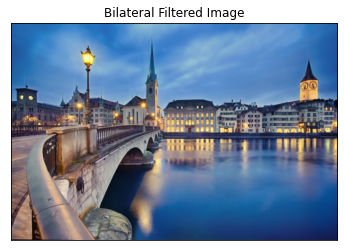

In [176]:
Bilateral_img=cv.bilateralFilter(img_color,9,80,80)#Bilateral filter
plt.imshow(Bilateral_img)
plt.xticks([])
plt.yticks([])
plt.title("Bilateral Filtered Image")
plt.show()

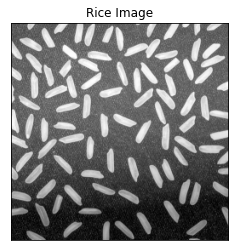

In [171]:
#connected component analysis 
rice_img=cv.imread('Downloads/rice.png',0)
plt.imshow(rice_img,'gray')
plt.xticks([])
plt.yticks([])
plt.title("Rice Image")
plt.show()

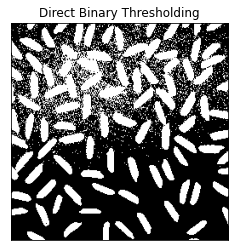

In [14]:
ret,Direct_binary_threshold=cv.threshold(rice_img,110,255,cv.THRESH_BINARY)
plt.imshow(Direct_binary,'gray')
plt.xticks([])
plt.yticks([])
plt.title("Direct Binary Thresholding")
plt.show()

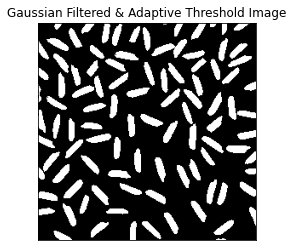

In [16]:
rice_gaus=cv.GaussianBlur(rice_img,(3,3),0.4)
rice_binary= cv.adaptiveThreshold(rice_gaus,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,cv.THRESH_BINARY,55,-30)
plt.imshow(rice_binary,'gray')
plt.xticks([])
plt.yticks([])
plt.title("Gaussian Filtered & Adaptive Threshold Image")
plt.show()

Amount of rice in the image= 100


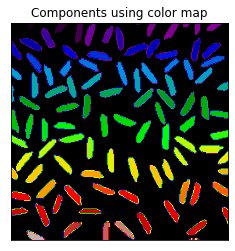

In [20]:
total_no_of_labels,labeled_img=cv.connectedComponents(rice_binary)
print("Amount of rice in the image=",total_no_of_labels-1)
plt.imshow(labeled_img,'nipy_spectral')
plt.xticks([])
plt.yticks([])
plt.title("Components using color map")
plt.show()


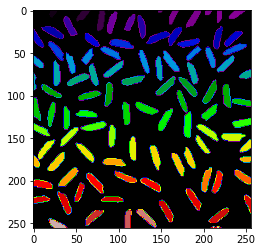

In [278]:
plt.imshow(labels,'nipy_spectral')

In [27]:
#Image zooming 
def zoomfunc_nearest_neighbourhood_npround(img,s,row,column):
    img=cv.copyMakeBorder(img,0,1,0,1,cv.BORDER_REFLECT_101)
    zoomed=np.empty((row,column,3),dtype='uint8')
    for i in range (1,row):
        for j in range (1,column):
            zoomed[i,j]=img[np.round(i/s).astype(np.int32),np.round(j/s).astype(np.int32)] 
    return(zoomed) 
    

In [33]:
def zoomfunc_nearest_neighbourhood_int(img,s,row,column):#img is the original img. s sacle factor. row- no of rows in zoomed 
    #image column- no of columns in zoomed image
    zoomed=np.empty((row,column,3),dtype='uint8')
    for i in range (0,row):
        for j in range (0,column):
            zoomed[i,j]=img[int(i/s),int(j/s)] 
    return(zoomed) 
    

In [25]:
def zoomfunc_bilinear(img,s,row,column):#img is the original img. s sacle factor. row- no of rows in zoomed image 
    #column- no of columns in zoomed image
    img=cv.copyMakeBorder(img,0,1,0,1,cv.BORDER_REFLECT_101)
    zoomed=np.empty((row,column,3),dtype='uint8')
    for i in range (1,row):
        for j in range (1,column):
            ro=i/s
            col=j/s
            upperrow=ro-int(ro)
            lowerrow=int(ro)+1-ro
            middle_inten_left=img[int(ro),int(col)]*lowerrow+img[int(ro)+1,int(col)]*upperrow
            middle_inten_right=img[int(ro),int(col)+1]*lowerrow+img[int(ro)+1,int(col)+1]*upperrow
            leftcol=col-int(col)
            rightcol=int(col)+1-col
            zoomed[i,j]=leftcol*middle_inten_right+rightcol*middle_inten_left
    return(zoomed) 


Scale factor=4
Image: 1


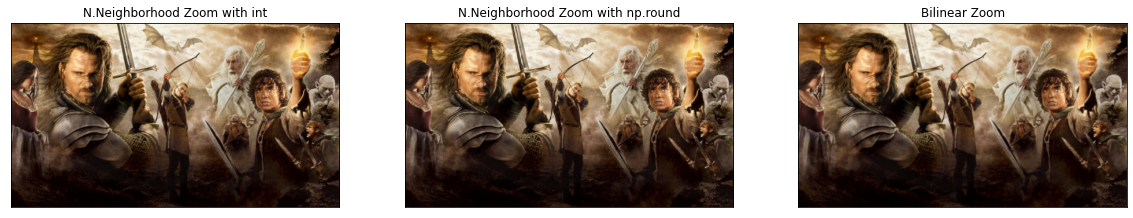

Image: 2


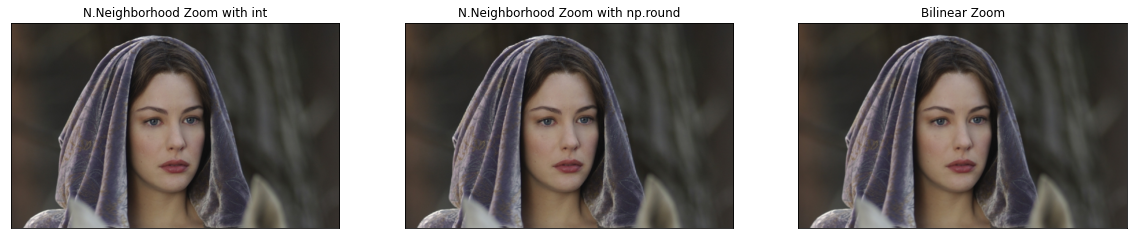

Cannot calculate ssd since dimensions doesn't match
Image: 3


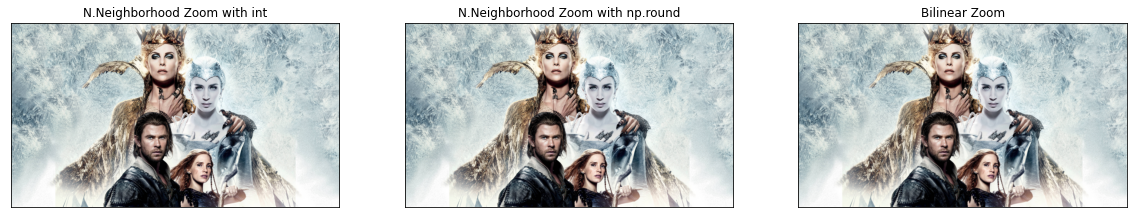

Image: 4


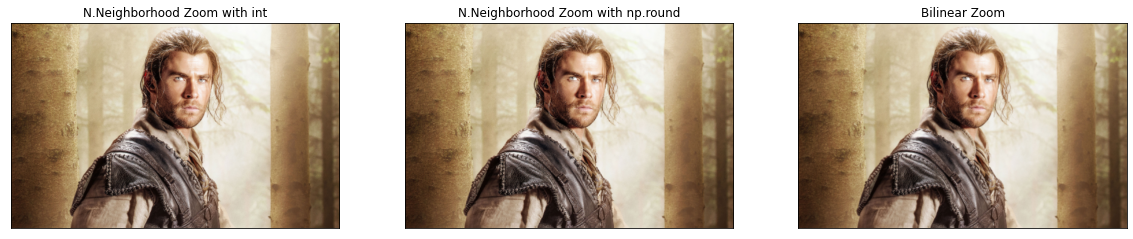

Image: 5


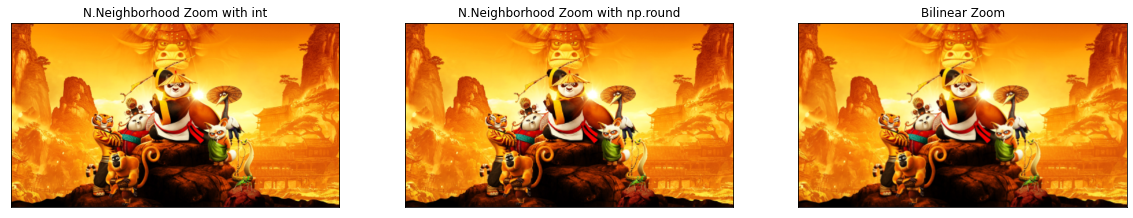

Image: 6


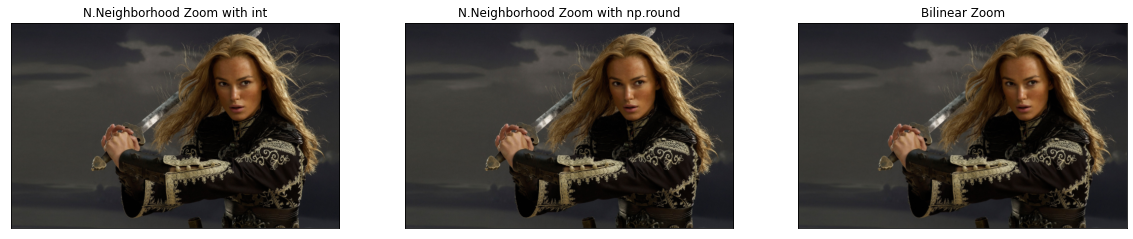

Cannot calculate ssd since dimensions doesn't match
Image: 7


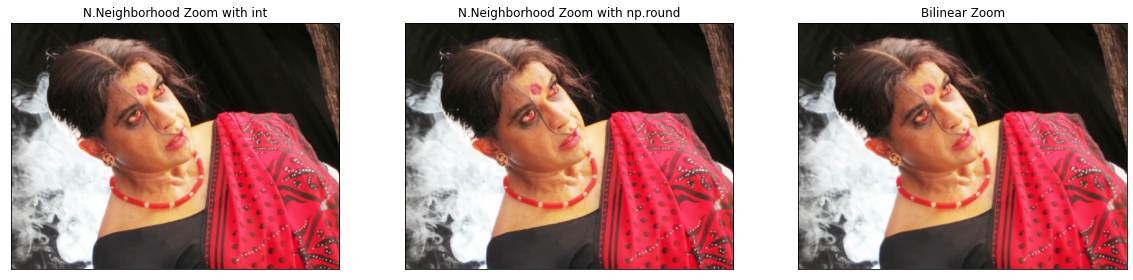

Cannot calculate ssd since dimensions doesn't match


In [149]:
l=['Downloads\Assignmnet 1\im01small.png','Downloads\Assignmnet 1\im02small.png','Downloads\Assignmnet 1\im03small.png','Downloads\Assignmnet 1\im04small.png','Downloads\Assignmnet 1\im05small.png','Downloads\Assignmnet 1\im06small.png','Downloads\Assignmnet 1\im07small.png','Downloads\Assignmnet 1\im08small.png','Downloads\Assignmnet 1\im09small.png','Downloads\Assignmnet 1\im10small.png']
l_original=['Downloads\Assignmnet 1\im01.png','Downloads\Assignmnet 1\im02.png','Downloads\Assignmnet 1\im03.png','Downloads\Assignmnet 1\im04.png','Downloads\Assignmnet 1\im05.png','Downloads\Assignmnet 1\im06.png','Downloads\Assignmnet 1\im07.png','Downloads\Assignmnet 1\im08.png','Downloads\Assignmnet 1\im09.png','Downloads\Assignmnet 1\im10.png']
NN_int=[]
NN_npround=[]
Bi=[]
s=int(input("Scale factor="))
if (0<s<=10):
 for i in range(0,len(l)):
   img=cv.imread(l[i])
   img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
   zoom_original=cv.imread(l_original[i])
   zoom_original=cv.cvtColor(zoom_original,cv.COLOR_BGR2RGB)
   row=int(img.shape[0]*s)
   column=int(img.shape[1]*s)
   if (row==zoom_original.shape[0]) and (column==zoom_original.shape[1]):#Incase if originaly zoomed image's dimension 
        #doesn't match our scale zoomed image's dimension so we cannot calculate ssd. 
                zoomed_nn=zoomfunc_nearest_neighbourhood_int(img,s,row,column)
                NN_int.append(zoomed_nn)
                zoomed_bi=zoomfunc_bilinear(img,s,row,column)
                Bi.append(zoomed_bi)
                zoomed_nn_round=zoomfunc_nearest_neighbourhood_npround(img,s,row,column)
                NN_npround.append(zoomed_nn_round)
                fig,ax=plt.subplots(1,3,figsize=(20,20))
                ax[0].imshow(zoomed_nn)
                ax[1].imshow(zoomed_nn_round)
                ax[2].imshow(zoomed_bi)
                ax[0].set_xticks([])
                ax[0].set_yticks([])
                ax[1].set_xticks([])
                ax[1].set_yticks([])
                ax[2].set_xticks([])
                ax[2].set_yticks([])
                print("Image:",len(Bi))
                ax[0].set_title("N.Neighborhood Zoom with int")
                ax[1].set_title("N.Neighborhood Zoom with np.round")
                ax[2].set_title("Bilinear Zoom")
                plt.show()
   else:
        print("Cannot calculate ssd since dimensions doesn't match")
else:
    print("Invalid scale value")

In [78]:
#SSD calculation 
def SSD(img0,img1,img2,img3):
    dif_nn=(img1-img3)
    noise_nn=np.multiply(dif_nn,dif_nn)
    s_nn=np.sum(noise_nn)
    s_nn=(s_nn/(img3.shape[0]*img3.shape[1]*255*255))*100
    dif_bi=(img2-img3)
    noise_bi=np.multiply(dif_bi,dif_bi)
    s_bi=np.sum(noise_bi)
    s_bi=(s_bi/(img3.shape[0]*img3.shape[1]*255*255))*100
    dif_nn_npround=(img0-img3)
    noise_nn_npround=np.multiply(dif_nn_npround,dif_nn_npround)
    s_nn_npround=np.sum(noise_nn_npround)
    s_nn_npround=(s_nn_npround/(img3.shape[0]*img3.shape[1]*255*255))*100
    return(noise_nn,s_nn,noise_bi,s_bi,noise_nn_npround,s_nn_npround)

In [126]:
Noise_nn=[]
Noise_bi=[]
Noise_nn_npround=[]
l_matchdimentions=['Downloads\Assignmnet 1\im01.png','Downloads\Assignmnet 1\im02.png','Downloads\Assignmnet 1\im04.png','Downloads\Assignmnet 1\im05.png','Downloads\Assignmnet 1\im06.png','Downloads\Assignmnet 1\im07.png','Downloads\Assignmnet 1\im09.png']
for i in range(0,len(Bi)):
    zoom_original_gray=cv.imread(l_matchdimentions[i],0)
    zoomed_gray=cv.cvtColor(NN_int[i],cv.COLOR_RGB2GRAY)
    zoomed_gray2=cv.cvtColor(Bi[i],cv.COLOR_RGB2GRAY)
    zoomed_gray3=cv.cvtColor(NN_npround[i],cv.COLOR_RGB2GRAY)
    zoomed_gray=zoomed_gray.astype('int64')
    zoom_original_gray=zoom_original_gray.astype('int64')
    zoomed_gray2=zoomed_gray2.astype('int64')
    zoomed_gray3=zoomed_gray3.astype('int64')
    noise_nn,ss_nn,noise_bi,ss_bi,noise_nn_npround,ss_nn_npround=SSD(zoomed_gray3,zoomed_gray,zoomed_gray2,zoom_original_gray)
    print ("Image",i+1,"SSD in Nearest Neighbourhood(int) =",ss_nn,"%")
    print("Image",i+1,"SSD in Bilinear =",ss_bi,"%")
    print ("Image",i+1,"SSD in Nearest Neighbourhood(np.round) =",ss_nn_npround,"%")
    Noise_nn.append(noise_nn)
    Noise_bi.append(noise_bi)
    Noise_nn_npround.append(noise_nn_npround)
    
    print(" ")

Image 1 SSD in Nearest Neighbourhood(int) = 0.21185360435326395 %
Image 1 SSD in Bilinear = 0.3539667161193938 %
Image 1 SSD in Nearest Neighbourhood(np.round) = 0.43973131772680024 %
 
Image 2 SSD in Nearest Neighbourhood(int) = 0.0419368819150754 %
Image 2 SSD in Bilinear = 0.08238407837263446 %
Image 2 SSD in Nearest Neighbourhood(np.round) = 0.10750233016681618 %
 
Image 3 SSD in Nearest Neighbourhood(int) = 1.2169101377274767 %
Image 3 SSD in Bilinear = 1.4390828664322481 %
Image 3 SSD in Nearest Neighbourhood(np.round) = 1.5833496099775846 %
 
Image 4 SSD in Nearest Neighbourhood(int) = 0.43994343187983254 %
Image 4 SSD in Bilinear = 0.5751716427175446 %
Image 4 SSD in Nearest Neighbourhood(np.round) = 0.6459828925306506 %
 
Image 5 SSD in Nearest Neighbourhood(int) = 0.2990784312242205 %
Image 5 SSD in Bilinear = 0.4449913064656993 %
Image 5 SSD in Nearest Neighbourhood(np.round) = 0.5430572887742606 %
 
Image 6 SSD in Nearest Neighbourhood(int) = 0.29513296606173106 %
Image 6 S

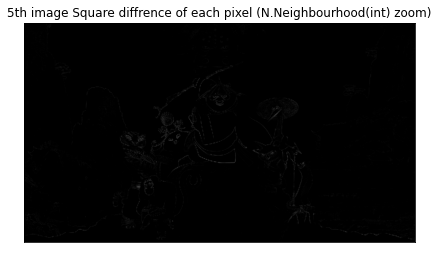

In [112]:
first_img=Noise_nn[4]
maxs=0
for i in range(row):
    max_internal=max(first_img[i])
    maxs=max(maxs,max_internal)
noise_norm=(first_img/maxs)*255
noise_norm=noise_norm.astype('uint8')
fig,ax=plt.subplots(figsize=(7,7))
ax.imshow(noise_norm,'gray')
plt.xticks([])
plt.yticks([])
plt.title("5th image Square diffrence of each pixel (N.Neighbourhood(int) zoom)")
plt.show()

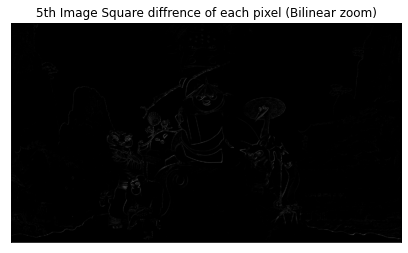

In [113]:
first_img=Noise_bi[4]
maxs=0
for i in range(row):
    max_internal=max(first_img[i])
    maxs=max(maxs,max_internal)
noise_norm=(first_img/maxs)*255
noise_norm=noise_norm.astype('uint8')
fig,ax=plt.subplots(figsize=(7,7))
ax.imshow(noise_norm,'gray')
plt.xticks([])
plt.yticks([])
plt.title("5th Image Square diffrence of each pixel (Bilinear zoom)")
plt.show()

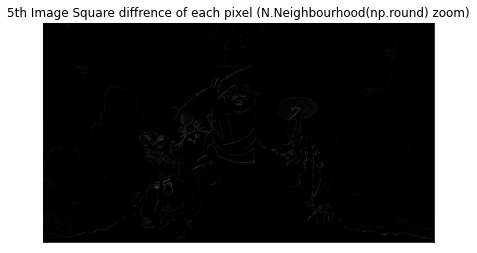

In [114]:
fisrt_img=Noise_nn_npround[4]
maxs=0
for i in range(row):
    max_internal=max(first_img[i])
    maxs=max(maxs,max_internal)
noise_norm=(first_img/maxs)*255
noise_norm=noise_norm.astype('uint8')
fig,ax=plt.subplots(figsize=(7,7))
ax.imshow(noise_norm,'gray')
plt.xticks([])
plt.yticks([])
plt.title("5th Image Square diffrence of each pixel (N.Neighbourhood(np.round) zoom)")
plt.show()

In [145]:
def SSD2(img0,img1,img2,img3):#using 3 channel avarage SSD calculation 
   dif1=img0-img3
   sq1=np.multiply(dif1,dif1)
   tot1=np.sum(sq1)
   perchannel1=tot1/3
   s_nn_round=(perchannel1/(img3.shape[0]*img3.shape[1]*255*255))*100
   dif2=img1-img3
   sq2=np.multiply(dif2,dif2)
   tot2=np.sum(sq2)
   perchannel2=tot2/3
   s_nn=(perchannel2/(img3.shape[0]*img3.shape[1]*255*255))*100
   dif3=img2-img3
   sq3=np.multiply(dif3,dif3)
   tot3=np.sum(sq3)
   perchannel3=tot3/3
   s_bi=(perchannel3/(img3.shape[0]*img3.shape[1]*255*255))*100
   return(s_nn_round,s_nn,s_bi)
for i in range (0,len(Bi)):    
 imgx=cv.imread(l_matchdimentions[i])
 imgx=cv.cvtColor(imgx,cv.COLOR_BGR2RGB)
 zoomed_original=imgx.astype('int64')
 zoomed2=Bi[i].astype('int64')
 zoomed=NN_int[i].astype('int64')
 zoomed0=NN_npround[i].astype('int64')
 s_nn_round,s_nn,s_bi=SSD2(zoomed0,zoomed,zoomed2,zoomed_original)
 print("Image",i+1,"SSD in N.Neighbourhood(int) using 3 chsnnel avg=",s_nn,"%")
 print("Image",i+1,"SSD in Bilinear using 3 channel avg=",s_bi,"%")
 print("Image",i+1,"SSD in N.Neighbourhood(np.round) using 3 channel avg=",s_nn_round,"%")
 print(" ")

SSD in N.Neighbourhood(int) using 3 chsnnel avg= 0.2095640891917164 %
SSD in Bilinear using 3 channel avg= 0.3508972231220818 %
SSD in N.Neighbourhood(np.round) using 3 channel avg= 0.4356502598517823 %
 
SSD in N.Neighbourhood(int) using 3 chsnnel avg= 0.04067064572742678 %
SSD in Bilinear using 3 channel avg= 0.08100463430197788 %
SSD in N.Neighbourhood(np.round) using 3 channel avg= 0.10535834641590841 %
 
SSD in N.Neighbourhood(int) using 3 chsnnel avg= 1.211112769794737 %
SSD in Bilinear using 3 channel avg= 1.4314114280248733 %
SSD in N.Neighbourhood(np.round) using 3 channel avg= 1.5726209048598159 %
 
SSD in N.Neighbourhood(int) using 3 chsnnel avg= 0.43958680533306277 %
SSD in Bilinear using 3 channel avg= 0.5738548081133324 %
SSD in N.Neighbourhood(np.round) using 3 channel avg= 0.6440247151647515 %
 
SSD in N.Neighbourhood(int) using 3 chsnnel avg= 0.28852107224112916 %
SSD in Bilinear using 3 channel avg= 0.4410332524844037 %
SSD in N.Neighbourhood(np.round) using 3 channel

In [121]:
img1=cv.imread(l_matchdimentions[0])
img2=cv.imread(l_matchdimentions[4])
bilinear_img1 = cv.resize(cv.imread(l[0]),None, fx = 4, fy = 4, interpolation = cv.INTER_LINEAR)
near_img1 = cv.resize(cv.imread(l[0]),None, fx = 4, fy = 4, interpolation = cv.INTER_NEAREST)
bilinear_img2 = cv.resize(cv.imread(l[5]),None, fx = 4, fy = 4, interpolation = cv.INTER_LINEAR)
near_img2 = cv.resize(cv.imread(l[5]),None, fx = 4, fy = 4, interpolation = cv.INTER_NEAREST)
bilinear_img1=bilinear_img1.astype('int64')
bilinear_img2=bilinear_img2.astype('int64')
near_img1=near_img1.astype('int64')
near_img2=near_img2.astype('int64')
img1=img1.astype('int64')
img2=img2.astype('int64')

In [122]:
dif1=bilinear_img1-img1
sq1=np.multiply(dif1,dif1)
total1=np.sum(sq1)
per_channel1=total1/3
SSD1_bi_per=(per_channel1/(img1.shape[0]*img1.shape[1]*255*255))*100
print("Image 1 SSD after direct OpenCV bilinear zoom=",SSD1_bi_per,"%")
dif2=near_img1-img1
sq2=np.multiply(dif2,dif2)
total2=np.sum(sq2)
per_channel2=total2/3
SSD1_near_per=(per_channel2/(img1.shape[0]*img1.shape[1]*255*255))*100
print("Image 1 SSD after direct OpenCV N.neighborhood zoom=",SSD1_near_per,"%")
print(" ")
dif3=bilinear_img2-img2
sq3=np.multiply(dif3,dif3)
total3=np.sum(sq3)
per_channel3=total3/3
SSD1_bi_per=(per_channel3/(img1.shape[0]*img1.shape[1]*255*255))*100
print("Image 5 SSD after direct OpenCV bilinear zoom=",SSD1_bi_per,"%")
dif4=near_img2-img2
sq4=np.multiply(dif4,dif4)
total4=np.sum(sq4)
per_channel4=total4/3
SSD1_near_per=(per_channel4/(img1.shape[0]*img1.shape[1]*255*255))*100
print("Image 5 SSD after direct OpenCV N.neighborhood zoom=",SSD1_near_per,"%")

Image 1 SSD after direct OpenCV bilinear zoom= 0.17699638785454472 %
Image 1 SSD after direct OpenCV N.neighborhood zoom= 0.2095640891917164 %
 
Image 5 SSD after direct OpenCV bilinear zoom= 0.24873877697007954 %
Image 5 SSD after direct OpenCV N.neighborhood zoom= 0.28852107224112916 %
